In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/user0/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

2024-06-17 23:21:03.207044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 23:21:03.207100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 23:21:03.208429: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 23:21:03.216062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 23:21:04.321604: W tensorflow/compiler/tf2

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('../datasets/spam_ham_dataset.csv', encoding='cp1251')
data.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
data.shape

(5171, 4)

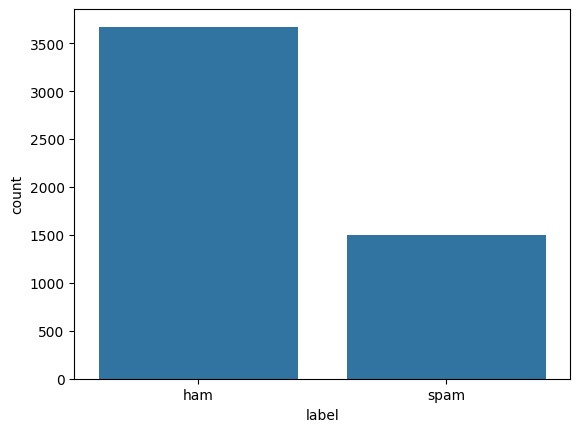

In [7]:
sns.countplot(x='label', data=data)
plt.show()

      Unnamed: 0 label                                               text  \
0           2817   ham  Subject: neon lesson # 5\r\nhere is your next ...   
1           2479   ham  Subject: weekly fan fares\r\ndelta fan fares f...   
2            136   ham  Subject: re : hl & p for 12 / 99\r\nit is the ...   
3           3265   ham  Subject: hpl nom for may 23 , 2001\r\n( see at...   
4           2848   ham  Subject: phillips - 4 / 01\r\ncarlos ,\r\ni cr...   
...          ...   ...                                                ...   
2993        4381  spam  Subject: pictures\r\nstreamlined denizen ajar ...   
2994        4979  spam  Subject: penny stocks are about timing\r\nnoma...   
2995        4162  spam  Subject: anomaly boys from 3881\r\nuosda apapr...   
2996        4365  spam  Subject: slutty milf wants to meet you\r\ntake...   
2997        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

Text(0.5, 0, 'Message types')

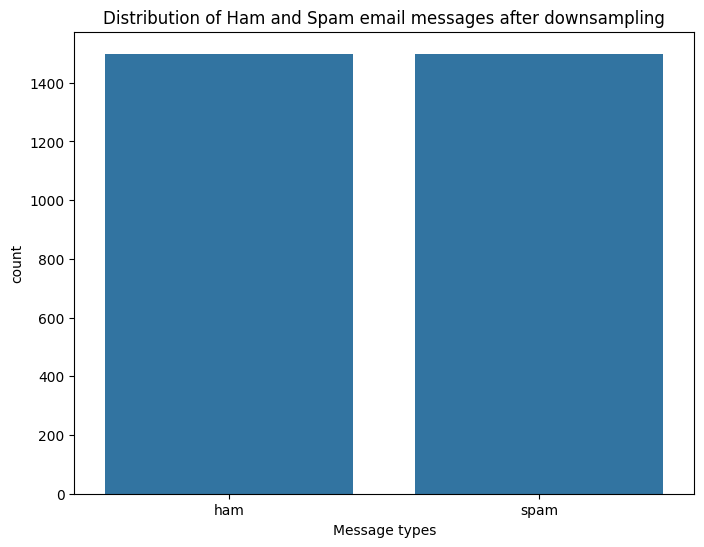

In [8]:
ham_msg = data[data.label_num == 0]
spam_msg = data[data.label_num == 1]
ham_msg = ham_msg.sample(n=len(spam_msg),random_state=42, replace=True)
 
# Plotting the counts of down sampled dataset
balanced_data = pd.concat([ham_msg, spam_msg], ignore_index=True).reset_index(drop=True)
print(balanced_data)
plt.figure(figsize=(8, 6))
sns.countplot(data = balanced_data, x='label')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')

In [9]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject: ', '')
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,2817,ham,neon lesson # 5\r\nhere is your next lesson . ...,0
1,2479,ham,weekly fan fares\r\ndelta fan fares for februa...,0
2,136,ham,re : hl & p for 12 / 99\r\nit is the pipelines...,0
3,3265,ham,"hpl nom for may 23 , 2001\r\n( see attached fi...",0
4,2848,ham,"phillips - 4 / 01\r\ncarlos ,\r\ni created the...",0


In [10]:
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,2817,ham,neon lesson 5\r\nhere is your next lesson ...,0
1,2479,ham,weekly fan fares\r\ndelta fan fares for februa...,0
2,136,ham,re hl p for 12 99\r\nit is the pipelines de...,0
3,3265,ham,hpl nom for may 23 2001\r\n see attached file...,0
4,2848,ham,phillips 4 01\r\ncarlos \r\ni created the fo...,0


In [11]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
 
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
        word = word.lower()
 
        if word not in stop_words:
            imp_words.append(word)
 
    output = " ".join(imp_words)
 
    return output
 
 
balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()


,Unnamed: 0,label,text,label_num
0,2817,ham,neon lesson 5 next lesson fun experiencing god...,0
1,2479,ham,weekly fan fares delta fan fares february 3 fe...,0
2,136,ham,hl p 12 99 pipelines decision allocate shipper...,0
3,3265,ham,hpl nom may 23 2001 see attached file hplno 52...,0
4,2848,ham,phillips 4 01 carlos created following deal 4 ...,0


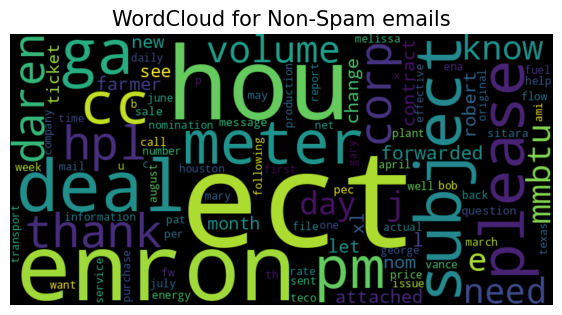

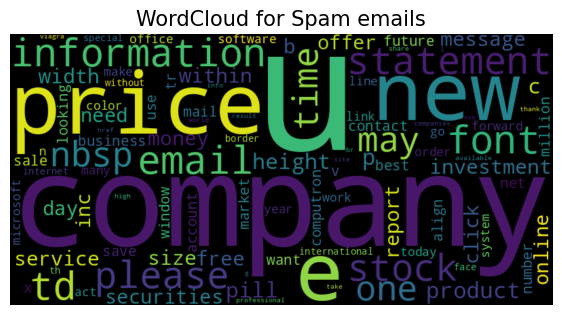

In [12]:
def plot_word_cloud(data, typ):
    sms_corpus = " ".join(data['text'])
 
    plt.figure(figsize=(7, 7))
 
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(sms_corpus)
 
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()
 
plot_word_cloud(balanced_data[balanced_data['label_num'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label_num'] == 1], typ='Spam')


In [13]:
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
                                                    balanced_data['label_num'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [14]:
print(train_X.shape)
print(test_X.shape)

(2398,)
(600,)


In [15]:
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')
ft.get_dimension()
 
train_sequences = [[ft.get_word_vector(x) for x in sentence.split(" ")] for sentence in train_X]#[ft.get_sentence_vector(x) for x in train_X]


test_sequences = [[ft.get_word_vector(x) for x in sentence.split(" ")] for sentence in test_X]#[ft.get_sentence_vector(x) for x in test_X]
    

# Pad sequences to have the same length
max_len = 100  # maximum sequence length
batch_size = 32
train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len, 
                                padding='post', 
                                truncating='post',
                                dtype='float32')
test_sequences = pad_sequences(test_sequences, 
                               maxlen=max_len, 
                               padding='post', 
                               truncating='post',
                               dtype='float32')

In [16]:
train_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            train_sequences,
            train_Y
        )
    )
)

test_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            test_sequences,
            test_Y
        )
    )
)

2024-06-17 23:21:17.073399: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-17 23:21:17.114253: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-17 23:21:17.114561: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [17]:
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

next(iter(train_dataset))

(<tf.Tensor: shape=(32, 100, 300), dtype=float32, numpy=
 array([[[ 0.04017441, -0.07548215, -0.17076448, ...,  0.12886256,
          -0.02551233, -0.00908786],
         [ 0.05338873,  0.0629959 , -0.05693881, ...,  0.1606226 ,
          -0.07909401,  0.00027468],
         [-0.03525517,  0.02714154,  0.00854601, ...,  0.07951748,
          -0.05470147,  0.0246776 ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],
 
        [[ 0.02726553, -0.10176626, -0.00404413, ...,  0.10671194,
          -0.04589582, -0.03757778],
         [ 0.04038874, -0.00662767,  0.16862535, ...,  0.08552   ,
           0.02926591, -0.04102996],
         [ 0.03755475,  0.01018214, -0.02839587, ...,  0.14901976,
          -0.05419166, -0.0

In [18]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def fpr(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    fp = K.sum(K.round(neg_y_true * y_pred))
    tn = K.sum(K.round(neg_y_true * neg_y_pred))
    specificity = fp / (tn + fp + K.epsilon())
    return specificity
    return fpr

In [19]:
'''model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=[max_len,], dtype=tf.float32)),
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32, 
                                    input_length=max_len))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='relu'))
model.build()

model.summary()'''

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=[max_len, ft.get_dimension()], dtype=tf.float32))
model.add(tf.keras.layers.Conv1D(filters=10, kernel_size=16, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Conv1D(filters=7, kernel_size=2, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.MaxPooling1D(pool_size=3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model.build()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall'),
                                                                     tf.keras.metrics.Precision(name='precision'),
                                                                     fpr])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 85, 10)            48010     
                                                                 
 conv1d_1 (Conv1D)           (None, 84, 7)             147       
                                                                 
 max_pooling1d (MaxPooling1  (None, 28, 7)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 196)               0         
                                                                 
 dense (Dense)               (None, 1)                 197       
                                                                 
Total params: 48354 (188.88 KB)
Trainable params: 48354 (188.88 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [20]:

#es = EarlyStopping(patience=3,
#                   monitor = 'val_accuracy',
#                   restore_best_weights = True)
 
lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)


In [21]:
history = model.fit(train_dataset,
                    validation_data=(test_dataset),
                    epochs=20, 
                    callbacks = [lr]#, es]
                   )

Epoch 1/20


2024-06-17 23:21:19.541477: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-17 23:21:20.536692: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
2024-06-17 23:21:20.676710: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-17 23:21:22.986445: I external/local_xla/xla/service/service.cc:168] XLA service 0x14cb64323930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-17 23:21:22.986500: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-06-17 23:21:22.993299: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718655683.133349 3697705 device_compiler.

75/75 [==============================] - 7s 18ms/step - loss: 2.1199 - accuracy: 0.5463 - recall: 0.2949 - precision: 0.6068 - fpr: 0.1966 - val_loss: 0.6600 - val_accuracy: 0.6883 - val_recall: 0.6491 - val_precision: 0.6801 - val_fpr: 0.2748 - lr: 0.0010
Epoch 2/20
75/75 [==============================] - 0s 6ms/step - loss: 0.4675 - accuracy: 0.7815 - recall: 0.7446 - precision: 0.8086 - fpr: 0.1774 - val_loss: 0.4669 - val_accuracy: 0.8100 - val_recall: 0.7719 - val_precision: 0.8178 - val_fpr: 0.1536 - lr: 0.0010
Epoch 3/20
75/75 [==============================] - 0s 6ms/step - loss: 0.3002 - accuracy: 0.8770 - recall: 0.8410 - precision: 0.9092 - fpr: 0.0860 - val_loss: 0.4225 - val_accuracy: 0.8500 - val_recall: 0.8421 - val_precision: 0.8421 - val_fpr: 0.1408 - lr: 0.0010
Epoch 4/20
75/75 [==============================] - 0s 6ms/step - loss: 0.2144 - accuracy: 0.9170 - recall: 0.8855 - precision: 0.9471 - fpr: 0.0520 - val_loss: 0.3483 - val_accuracy: 0.8783 - val_recall: 0.86

In [22]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

19/19 [==============================] - 1s 4ms/step - loss: 0.3604 - accuracy: 0.9417 - recall: 0.9439 - precision: 0.9340 - fpr: 0.0606


ValueError: too many values to unpack (expected 2)

In [ ]:
#plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['recall'], label='Training Recall')
#plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.plot(history.history['val_fpr'], label='Validation False Positives Rate')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
def filter_message(msg):
    test_msg = [[ft.get_word_vector(x) for x in msg.split(" ")]]
    test_msg = pad_sequences(test_msg, maxlen=max_len, padding='post', dtype='float32')
    return model.predict(test_msg, verbose=0)

In [ ]:
msg = "Buy our new product"
prediction = filter_message(msg)
print(prediction)
if (prediction > 0.5):
    print("Message", msg, "is spam")
else:
    print("Message ", msg, " is not spam")

df_test = pd.read_csv('../datasets/spam_ham_dataset.csv', encoding='cp1251')

df_test['text'] = df_test['text'].str.replace('Subject: ', '')
df_test['text'] = df_test['text'].apply(lambda x: remove_punctuations(x))
df_test['text'] = df_test['text'].apply(lambda x: remove_stopwords(x))

test_msg = list(df_test['text'])
test_ans = list(df_test['label'])

tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(test_msg)):
    prediction = filter_message(test_msg[i])
    if prediction >= 0.5 and test_ans[i] == 'spam':
        tp += 1
    elif prediction < 0.5 and test_ans[i] == 'ham':
        tn += 1
    elif prediction < 0.5 and test_ans[i] == 'spam':
        fn += 1
    elif prediction >= 0.5 and test_ans[i] == 'ham':
        fp += 1
        
print("True positives = ", tp)
print("True negatives = ", tn)
print("False positives = ", fp)
print("False negatives = ", fn)

In [ ]:
df_test

In [ ]:
#model.save('model_3')